In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
def f1(a, b, c=0):
    print(f"a={a} ; b={b} ; c={c}")

In [2]:
f1(1, 2, 3)
f1(1, 2, c=4)
f1(a=12, b=13)

a=1 ; b=2 ; c=3
a=1 ; b=2 ; c=4
a=12 ; b=13 ; c=0


In [3]:
# tous les paramètres à droite du * doivent être fournis par keyword
def f2(a, b, *, c=0): 
    print(f"a={a} ; b={b} ; c={c}")

In [4]:
# f2(1, 2, 3) # forbidden
f2(1, 2, c=4)
f2(a=12, b=13)
f2(a=12, b=13, c=55)
f2(c=12, b=13, a=55)

a=1 ; b=2 ; c=4
a=12 ; b=13 ; c=0
a=12 ; b=13 ; c=55
a=55 ; b=13 ; c=12


In [5]:
def f3(a, b, /, c=0): 
    print(f"a={a} ; b={b} ; c={c}")

In [6]:
f3(1, 2, 3)
f3(1, 2, c=4)

# forbidden: a,b by keyword
# f3(a=12, b=13)
# f3(a=12, b=13, c=55)
# f3(c=12, b=13, a=55)

a=1 ; b=2 ; c=3
a=1 ; b=2 ; c=4


In [7]:
def f4(a, b, /, *, c=0): 
    print(f"a={a} ; b={b} ; c={c}")

In [8]:
# f4(1, 2, 3) # c by position forbidden
f4(1, 2, c=4)
f4(1, 2)

# forbidden: a,b by keyword
# f4(a=12, b=13)
# f4(a=12, b=13, c=55)
# f4(c=12, b=13, a=55)

a=1 ; b=2 ; c=4
a=1 ; b=2 ; c=0


In [9]:
sum?

Signature: sum(iterable, /, start=0)
Docstring:
Return the sum of a 'start' value (default: 0) plus an iterable of numbers

When the iterable is empty, return the start value.
This function is intended specifically for use with numeric values and may
reject non-numeric types.
Type:      builtin_function_or_method

In [10]:
sum(range(10), 1000)

1045

In [11]:
sum(range(10), start=1000)

1045

In [12]:
# TypeError: sum() takes at least 1 positional argument (0 given)
# sum(iterable=range(10), start=1000)

## valeur par défaut mutable

### bad pratice
init a paramater with a mutable object (same object for all calls)

In [13]:
def play_with_list(a, b, l = []):
    l.extend((a,b))
    print('debug intern:', l)
    return l

In [14]:
data = [1, 2, 3]

In [15]:
play_with_list(4, 5, data)
data

debug intern: [1, 2, 3, 4, 5]


[1, 2, 3, 4, 5]

In [16]:
data2 = play_with_list(6, 7)
data2

debug intern: [6, 7]


[6, 7]

In [17]:
play_with_list(8, 9, data2)
data2

debug intern: [6, 7, 8, 9]


[6, 7, 8, 9]

In [18]:
data3 = play_with_list(10, 11)
data3

debug intern: [6, 7, 8, 9, 10, 11]


[6, 7, 8, 9, 10, 11]

### solution 1: init with None

In [19]:
def play_with_list1(a, b, l = None):
    if l is None:
        l = []
    l.extend((a,b))
    print('debug intern:', l)
    return l

In [20]:
data2 = play_with_list1(1, 2)
data3 = play_with_list1(3, 4)
print(data2)
print(data3)

debug intern: [1, 2]
debug intern: [3, 4]
[1, 2]
[3, 4]


## solution 2: factory

In [21]:
def play_with_list2(a, b, l = None, list_factory = None):
    if l is None:
        if list_factory is not None:
            l = list_factory()
        else:
            l = []
    l.extend((a,b))
    print('debug intern:', l)
    return l

In [22]:
play_with_list2(12, 13, data)
data

debug intern: [1, 2, 3, 4, 5, 12, 13]


[1, 2, 3, 4, 5, 12, 13]

In [23]:
data5 = play_with_list2(14, 15, list_factory=list)
data5

debug intern: [14, 15]


[14, 15]

In [24]:
for _ in range(10):
    _ = play_with_list2(16, 17, list_factory=lambda: [1, 2, 3])

debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]
debug intern: [1, 2, 3, 16, 17]


## varargs by position or keyword

In [28]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

In [29]:
x = np.linspace(0, 6*np.pi, 1_000)
y = np.sin(x)
z = np.cos(x)

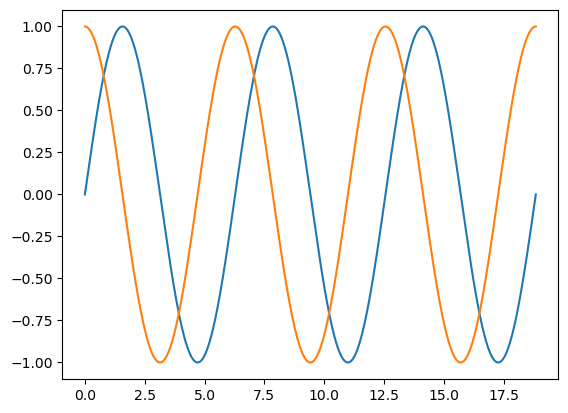

In [30]:
plt.plot(x, y, x, z)

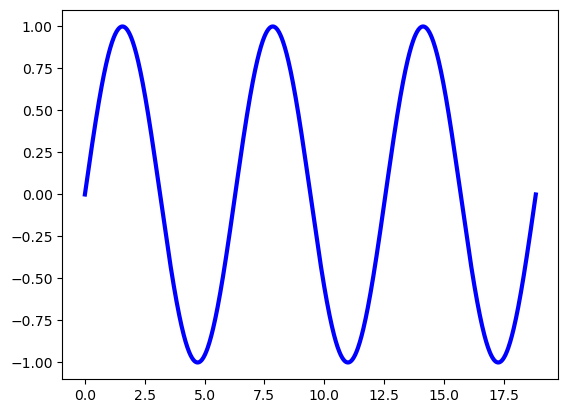

In [33]:
plt.plot(x, y, color="blue", linewidth=3)

## pandas: beaucoup d'options
NB: toutes nommées (pas **kwargs)

In [35]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [39]:
# old pandas: paramètres optional par position accepté
# pd.read_csv('data/communes_france_2025.csv', ',')

# new pandas: options by keyword
df = pd.read_csv('data/communes_france_2025.csv', sep=',')
# TODO: add other options
df

C:\Users\matth\AppData\Local\Temp\ipykernel_40160\2919288352.py:5: DtypeWarning: Columns (1,12,14,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/communes_france_2025.csv', sep=',')


,Unnamed: 0,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
0,0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
1,1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
2,2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...
3,3,01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes,amberieux-en-dombes,AMBÉRIEUX-EN-DOMBES,COM,commune,...,4.903,45.996,4.912,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Ambarrois,https://fr.wikipedia.org/wiki/fr:Ambérieux-en-...,https://villedereve.fr/ville/01005-amberieux-e...
4,4,01006,Ambléon,Ambléon,à Ambléon,d'Ambléon,ambleon,AMBLÉON,COM,commune,...,5.601,45.750,5.594,6,Rural à habitat dispersé,0.0,communes non pôle,Ambléonais,https://fr.wikipedia.org/wiki/fr:Ambléon,https://villedereve.fr/ville/01006-ambleon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34930,34930,97613,M'Tsangamouji,M'Tsangamouji,à M'Tsangamouji,de M'Tsangamouji,m-tsangamouji,M'TSANGAMOUJI,COM,commune,...,45.084,-12.751,45.087,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:M'Tsangamouji,https://villedereve.fr/ville/97613-m-tsangamouji
34931,34931,97614,Ouangani,Ouangani,à Ouangani,d'Ouangani,ouangani,OUANGANI,COM,commune,...,45.139,-12.837,45.138,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:Ouangani,https://villedereve.fr/ville/97614-ouangani
34932,34932,97615,Pamandzi,Pamandzi,à Pamandzi,de Pamandzi,pamandzi,PAMANDZI,COM,commune,...,45.275,-12.796,45.284,2,Centres urbains intermédiaires,NaN,NaN,Pamandziens,https://fr.wikipedia.org/wiki/fr:Pamandzi,https://villedereve.fr/ville/97615-pamandzi
34933,34933,97616,Sada,Sada,à Sada,de Sada,sada,SADA,COM,commune,...,45.106,-12.861,45.119,2,Centres urbains intermédiaires,NaN,NaN,Sadois,https://fr.wikipedia.org/wiki/fr:Sada (Mayotte),https://villedereve.fr/ville/97616-sada
